In [1]:
import numpy as np
import pandas as pd
import os
import Orange
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

/home/s1620444/data1/automl-sr-rs-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


ImportError: cannot import name 'wilcoxoni' from 'scipy.stats' (/home/s1620444/data1/automl-sr-rs-env/lib/python3.7/site-packages/scipy/stats/__init__.py)

In [20]:
def get_run_params(filename):
    datasets=["cerrado", "oli2msi", "sr_ucmerced","sr_so2sat","sent_nicfi"] 
    if datasets[0] in file:
        dataset=datasets[0]
    elif datasets[1] in file:
        dataset=datasets[1]
    elif datasets[2] in file:
        dataset=datasets[2]
    elif datasets[3] in file:
        dataset=datasets[3]
    else:
        dataset=datasets[4]

    filename_parts=file.split("-")
    id= filename_parts[-1][0]
    return dataset,id

In [ ]:
RESULTSDIR="/data1/s1620444/results/"

In [21]:
with open(f"{RESULTSDIR}baselines/baseline_results.csv", "w") as f:
    f.write("baseline,dataset,id,psnr,ssim\n")
    baselines=["wdsr","rcan","rcan_undeep"]
    for baseline in baselines:
        for file in os.listdir(f"{RESULTSDIR}baselines/{baseline}"):
            if file.endswith(".csv") and file != "baseline_results.csv":
                # split filename by "-"
                dataset,id=get_run_params(file)
                with open(os.path.join(RESULTSDIR,"baselines", baseline,file), "r") as b:
                    lines=b.readlines()[0].replace(" ","").split(",")
                    f.write(",".join([baseline,dataset,id,lines[0],lines[1]])+"\n")

In [ ]:
df=pd.read_csv(os.path.join(RESULTSDIR,"baselines", "baseline_results.csv"), header=0)
df

,baseline,dataset,id,psnr,ssim
0,wdsr,sr_so2sat,4,37.631943,0.933230
1,wdsr,sent_nicfi,2,27.860149,0.773586
2,wdsr,sr_so2sat,2,37.624016,0.933196
3,wdsr,sr_so2sat,0,37.639362,0.933488
4,wdsr,cerrado,4,41.268337,0.974350
5,wdsr,cerrado,2,40.925991,0.972706
6,wdsr,sr_so2sat,1,37.603722,0.932886
7,wdsr,oli2msi,0,43.902195,0.971947
8,wdsr,oli2msi,4,43.881073,0.971825
9,wdsr,oli2msi,1,43.900368,0.971941


In [ ]:
df_autosr=pd.read_csv(os.path.join(RESULTSDIR,"autosr","autosr.csv"),names=["trials","version", "dataset","id","psnr", "ssim"])
df_autosr["baseline"]="autoSR-RS"
df_autosr.loc[df_autosr['trials'] ==100, 'baseline'] = "autoSR-RS_100"
df_autosr.loc[df_autosr['trials'] ==50, 'baseline'] = "autoSR-RS_50"
df_autosr.loc[df_autosr['trials'] ==10, 'baseline'] = "autoSR-RS_10"
df_autosr
# df_autosr.groupby(["dataset"])[["psnr", "ssim"]].mean()

,trials,version,dataset,id,psnr,ssim,baseline
0,20,v1,cerrado,0.0,41.596985,0.974382,autoSR-RS
1,20,v1,cerrado,0.0,39.153896,0.932145,autoSR-RS
2,20,v1,cerrado,0.0,42.194462,0.977517,autoSR-RS
3,20,v1,cerrado,0.0,38.020790,0.961904,autoSR-RS
4,20,v1,oli2msi,0.0,42.003559,0.957942,autoSR-RS
5,20,v1,oli2msi,0.0,45.052589,0.978238,autoSR-RS
6,20,v1,cerrado,0.0,42.099152,0.976507,autoSR-RS
7,20,v1,oli2msi,0.0,44.911335,0.977509,autoSR-RS
8,20,v1,sent_nicfi,0.0,30.316862,0.860030,autoSR-RS
9,20,v1,sent_nicfi,0.0,30.637455,0.864484,autoSR-RS


In [ ]:
df_srcnn=pd.read_csv(os.path.join(RESULTSDIR,"autosrcnn","autosrcnn.csv"),names=["trials", "dataset","id","psnr", "ssim"])
df_srcnn["baseline"]="autoSRCNN"
df_srcnn=df_srcnn.loc[df_srcnn.trials==20]
df_results=pd.concat([df,df_srcnn[["dataset", "id","psnr","ssim","baseline"]],df_autosr[["dataset", "id","psnr","ssim","baseline"]]])
df_results

,baseline,dataset,id,psnr,ssim
0,wdsr,sr_so2sat,4.0,37.631943,0.933230
1,wdsr,sent_nicfi,2.0,27.860149,0.773586
2,wdsr,sr_so2sat,2.0,37.624016,0.933196
3,wdsr,sr_so2sat,0.0,37.639362,0.933488
4,wdsr,cerrado,4.0,41.268337,0.974350
...,...,...,...,...,...
28,autoSR-RS_50,sent_nicfi,0.0,30.155462,0.855890
29,autoSR-RS_50,sent_nicfi,0.0,30.633562,0.864752
30,autoSR-RS_50,sent_nicfi,0.0,30.157454,0.855644
31,autoSR-RS_50,sent_nicfi,0.0,30.645859,0.864968


In [ ]:
df_per_run=df_results.groupby(["dataset","baseline"])[["psnr", "ssim"]].mean()
df_per_run["psnr_std"]=df_results.groupby(["dataset","baseline"])[["psnr"]].std()
df_per_run["ssim_std"]=df_results.groupby(["dataset","baseline"])[["ssim"]].std()
df_per_run

psnr      ssim   psnr_std  ssim_std
dataset     baseline                                               
cerrado     autoSR-RS      40.613057  0.964491   1.905678  0.019137
            autoSR-RS_100  42.101471  0.976348   0.829871  0.003052
            autoSRCNN      38.803330  0.950728   0.885031  0.008285
            rcan           38.483605  0.954351   0.375692  0.006735
            rcan_undeep    39.573652  0.969401   0.237758  0.001562
            wdsr           40.957959  0.972904   0.385369  0.001520
oli2msi     autoSR-RS      44.422572  0.974068   1.354235  0.009022
            autoSRCNN      43.130327  0.968019   0.675524  0.004535
            rcan           44.447389  0.974864   0.010638  0.000024
            wdsr           43.894878  0.971906   0.035707  0.000234
sent_nicfi  autoSR-RS      30.198584  0.855015   0.489654  0.012393
            autoSR-RS_10   29.654079  0.845657        NaN       NaN
            autoSR-RS_50   30.442611  0.861205   0.261373  0.004966
            autoSRCNN      28.851022  0.822349   0.217490  0.009380
            rcan           30.124865  0.853719   0.019283  0.000618
            wdsr           28.169381  0.784331   1.204455  0.052481
sr_so2sat   autoSRCNN      35.419881  0.887696   1.238558  0.033937
            rcan           38.280497  0.947636   0.007837  0.000099
            wdsr           37.624465  0.933174   0.013320  0.000221
sr_ucmerced autoSR-RS      33.571136  0.923823   0.227855  0.002383
            autoSR-RS_100  33.656029  0.923997   0.591421  0.005607
            autoSRCNN      30.821907  0.882456   1.442058  0.026860
            rcan           33.767515  0.925239   0.018542  0.000201
            wdsr           28.001481  0.741443  11.545230  0.395641

<h2> Normality test </h2>

In [9]:
def get_boxplot(df_results, metric):
    fig,ax=plt.subplots(nrows=4,ncols=5,figsize=(20,10))

    for i,b in enumerate(["wdsr","rcan","autoSRCNN", "autoSR-RS"]):
        
        for j,d in enumerate(["cerrado", "sr_ucmerced", "oli2msi", "sent_nicfi", "sr_so2sat"]):
            if j == 0:
                ax[i,j].set_ylabel(b)
            if i ==0:
                ax[0,j].set_title(d)
            scores = df_results[(df_results.baseline==b) & (df_results.dataset==d)]
            axis= scores.boxplot(ax = ax[i,j],column=[metric],color=dict(boxes="blue", medians="orange"), medianprops=dict(linewidth=3), patch_artist=True)

    plt.tight_layout()
    plt.show()

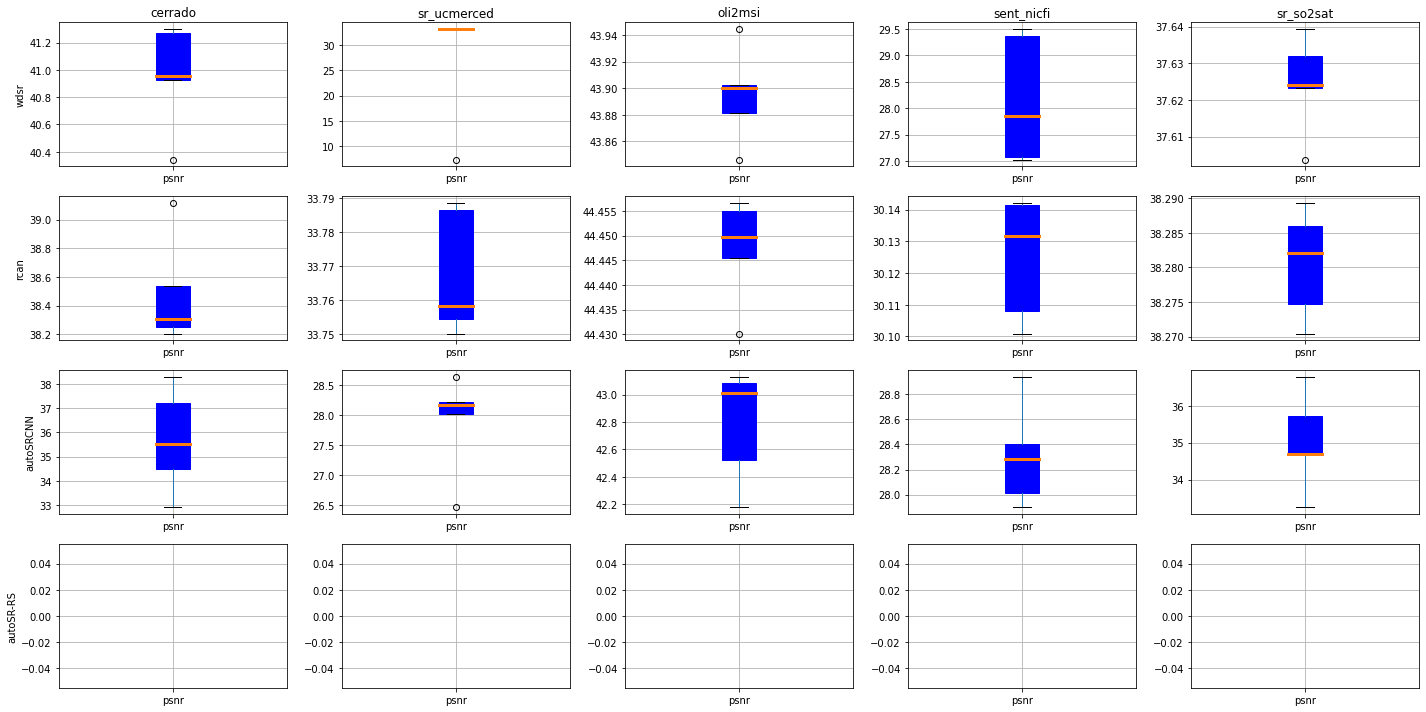

In [60]:
get_boxplot(df_results,"psnr")


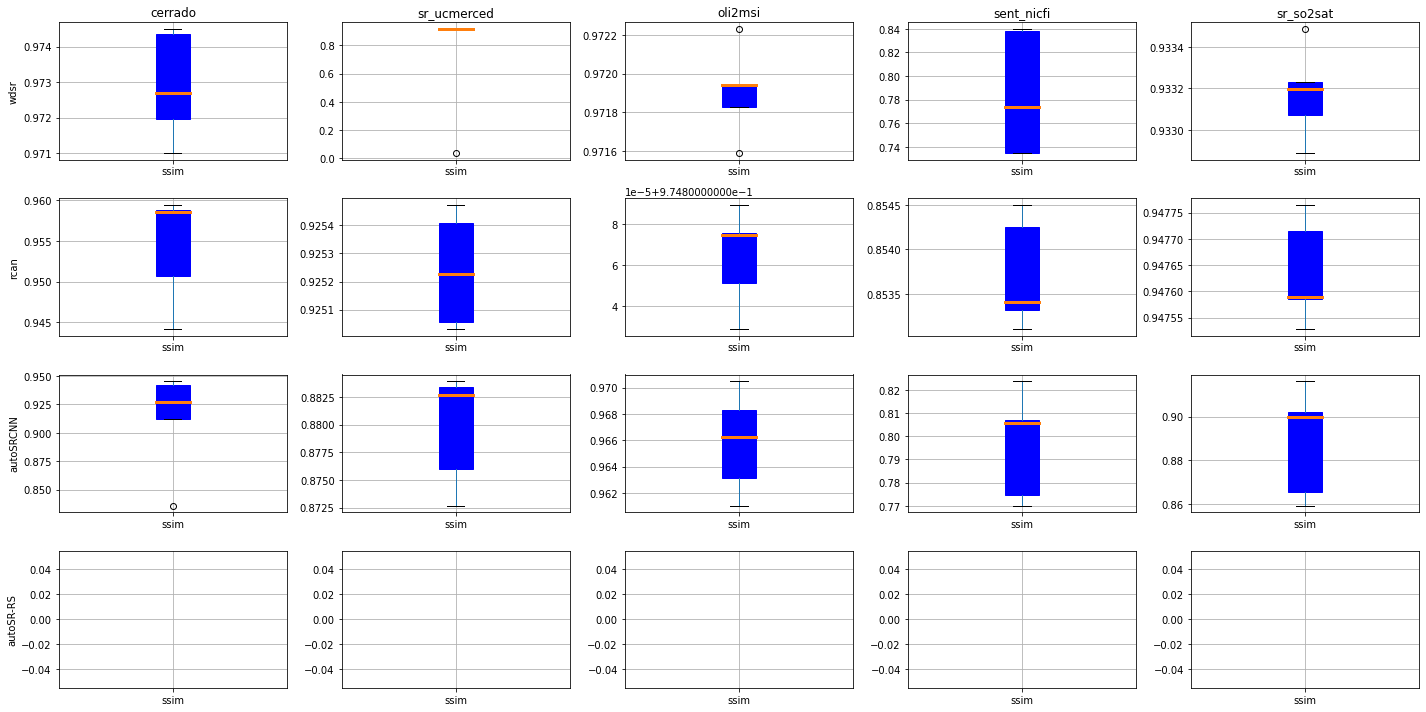

In [62]:
get_boxplot(df_results, "ssim")

<h2>Bootstrapping </h2>

In [ ]:
def bootstrap(measurements,sample_size,N=1000):
    samples= (np.random.choice(measurements,size=sample_size) for _ in range(N))
    return np.array([i for arr in samples for i in arr])

In [28]:
# slow but works
df_bootstrap_results=pd.DataFrame(columns=["dataset","baseline","ssim","psnr"])

for baseline in ["autoSR-RS","autoSRCNN", "wdsr","rcan"]:
    for dataset in ["cerrado", "sr_ucmerced","oli2msi","sent_nicfi"]:
        psnr_scores=df_results.loc[(df_results.baseline==baseline) & (df_results.dataset==dataset)]["psnr"].to_numpy()
        ssim_scores=df_results.loc[(df_results.baseline==baseline) & (df_results.dataset==dataset)]["ssim"].to_numpy()
        psnr_bootstrapped_scores=bootstrap(psnr_scores,3)
        ssim_bootstrapped_scores=bootstrap(ssim_scores,3)
        df_bootstrap_results
    
        for i in range(len(psnr_bootstrapped_scores)):
            df_bootstrap_results=df_bootstrap_results.append({"dataset":dataset,"baseline":baseline, "psnr":psnr_bootstrapped_scores[i], "ssim":ssim_bootstrapped_scores[i]},ignore_index=True)

In [29]:
df_bootstrap_results

,dataset,baseline,ssim,psnr
0,cerrado,autoSR-RS,0.961904,38.020790
1,cerrado,autoSR-RS,0.974382,38.020790
2,cerrado,autoSR-RS,0.932145,38.020790
3,cerrado,autoSR-RS,0.932145,42.099152
4,cerrado,autoSR-RS,0.977517,42.194462
...,...,...,...,...
47995,sent_nicfi,rcan,0.853103,30.107914
47996,sent_nicfi,rcan,0.854255,30.141569
47997,sent_nicfi,rcan,0.853103,30.131784
47998,sent_nicfi,rcan,0.854500,30.142155


<h2> Significance test </h2>

In [30]:
# count number of methods outperformed (per dataset)
def get_rank(df_bootstrap_results,metric):
    methods=["autoSR-RS","autoSRCNN", "wdsr","rcan"]
    datasets=["cerrado", "sr_ucmerced","oli2msi","sent_nicfi"]
    test_scores={"autoSR-RS":[0,0],"autoSRCNN":[0,0],"wdsr":[0,0],"rcan":[0,0]} # num stat sig better, num not stat sig

    from scipy.stats import wilcoxon
    # psnr
    for method in methods:
        for reference in methods:
            if reference != method:
                for dataset in datasets:
                    scores=df_bootstrap_results.loc[(df_bootstrap_results.baseline==method)&(df_bootstrap_results.dataset==dataset)][metric].to_numpy()
                    ref_scores=df_bootstrap_results.loc[(df_bootstrap_results.baseline==reference)&(df_bootstrap_results.dataset==dataset)][metric].to_numpy()
                    res=wilcoxon(scores,ref_scores)
                    if res.pvalue <0.05 and np.mean(scores) > np.mean(ref_scores):
                        test_scores[method][0]+=1
                    elif res.pvalue >=0.05:
                        test_scores[method][1]+=1
    return test_scores  


In [31]:
psnr_rank=get_rank(df_bootstrap_results,"psnr")
ssim_rank=get_rank(df_bootstrap_results,"ssim")
print(psnr_rank)
print(ssim_rank)

{'autoSR-RS': [9, 0], 'autoSRCNN': [3, 0], 'wdsr': [4, 0], 'rcan': [8, 0]}
{'autoSR-RS': [9, 0], 'autoSRCNN': [2, 0], 'wdsr': [4, 0], 'rcan': [9, 0]}


In [14]:
df_results

,baseline,dataset,id,psnr,ssim
25,autoSRCNN,cerrado,0.0,38.474682,0.947887
26,autoSRCNN,cerrado,0.0,38.594318,0.947514
27,autoSRCNN,cerrado,0.0,40.338253,0.965441
28,autoSRCNN,cerrado,0.0,38.051552,0.945344
29,autoSRCNN,sr_ucmerced,0.0,31.846682,0.901708
30,autoSRCNN,sr_ucmerced,0.0,29.543571,0.849689
31,autoSRCNN,sent_nicfi,0.0,28.942181,0.823200
32,autoSRCNN,sr_ucmerced,0.0,31.714716,0.898180
33,autoSRCNN,sr_ucmerced,0.0,32.024189,0.905763
34,autoSRCNN,cerrado,0.0,38.557846,0.947456


<h2> cd diagram </h2>

In [33]:
def get_avg_ranking(df_results,metric):   
    """ Get the average ranking of methods on each dataset""" 
    df_rankings=pd.DataFrame()
    df_results_Q1=df_results.loc[(df_results.baseline == "wdsr") | (df_results.baseline == "rcan") | (df_results.baseline == "autoSR-RS") | (df_results.baseline == "autoSRCNN")]
    for dataset in ["cerrado","sr_ucmerced","sent_nicfi","oli2msi"]:
        df_rankings[dataset]=df_results_Q1.loc[df_results_Q1.dataset==dataset].groupby(["baseline"])[metric].mean().rank(method="average",ascending=False)
    df_rankings.rename(index={"wdsr": 'WDSR',"rcan":"RCAN","autoSRCNN":"AutoSRCNN","autoSR-RS":"AutoSR-RS"},inplace=True)
    return df_rankings.mean(axis=1)

In [34]:
df_psnr_ranking=get_avg_ranking(df_results,"psnr")
df_psnr_ranking

baseline
AutoSR-RS    1.75
AutoSRCNN    3.25
RCAN         2.00
WDSR         3.00
dtype: float64

In [35]:
df_bootstrap_psnr_ranking=get_avg_ranking(df_bootstrap_results,"psnr")
df_bootstrap_psnr_ranking

baseline
AutoSR-RS    1.75
AutoSRCNN    3.25
RCAN         2.00
WDSR         3.00
dtype: float64

In [36]:
df_ssim_ranking=get_avg_ranking(df_results,"ssim")
df_ssim_ranking

baseline
AutoSR-RS    1.75
AutoSRCNN    3.50
RCAN         1.75
WDSR         3.00
dtype: float64

In [37]:
df_bootstrap_ssim_ranking=get_avg_ranking(df_bootstrap_results,"ssim")
df_bootstrap_ssim_ranking

baseline
AutoSR-RS    1.75
AutoSRCNN    3.50
RCAN         1.75
WDSR         3.00
dtype: float64

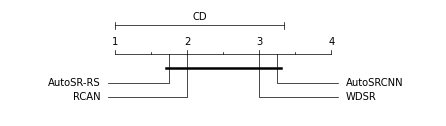

In [38]:

methods=df_psnr_ranking.index.tolist()
avranks=df_psnr_ranking.tolist()

cd = Orange.evaluation.compute_CD(avranks, 4) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks,methods, cd=cd, width=6, textspace=1.5)
plt.show()

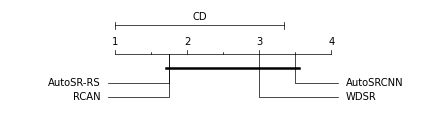

In [39]:
methods=df_ssim_ranking.index.tolist()
avranks=df_ssim_ranking.tolist()

cd = Orange.evaluation.compute_CD(avranks, 4) #tested on 30 datasets
Orange.evaluation.graph_ranks(avranks,methods, cd=cd, width=6, textspace=1.5)
plt.show()